<a href="https://colab.research.google.com/github/KOSETTPAI/Internship/blob/main/Final%20Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries and Dataset**

In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.2 MB/s eta 0:00:00


In [2]:
import re
import datasets
from datasets import load_dataset_builder, load_dataset

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [3]:
simbolo = load_dataset("Simbolo-Servicio/wiki-burmese-sentences")
sim_train = simbolo['train']['text']

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

# **Ending Words**

In [4]:
def segment(text):
    text = re.sub(r'(?:(?<!္)([က-ဪဿ၊-၏]|[၀-၉]+|[^က-၏]+)(?![ှျ]?[့္်]))', r'𝕊\1', text).strip('𝕊').split('𝕊')
    return text

In [6]:
EOS_2 = []

for sentence in sim_train:
  EOS_2.append(segment(sentence)[-1])

EOS_unique1 = list(set(EOS_2))

EOS_frequencies1 = {i: EOS_2.count(i) for i in EOS_unique1}
# EOS_frequencies1

In [7]:
EOS_frequencies_over_100 = {word: freq for word, freq in EOS_frequencies1.items() if freq > 100}

In [8]:
EOS_frequencies_over_100

{'ဘူး': 111,
 'မည်': 1015,
 'ရက်': 210,
 'သည်': 81575,
 'ချေ': 1000,
 'ခြင်း': 430,
 'ဉာဏ်': 126,
 'ပြီ': 252,
 'ရ': 114,
 'ခဲ့': 141,
 'ရှိ': 112,
 'ပေ': 1170,
 'ချောင်း': 106,
 'တယ်': 1481,
 'ပါ': 723,
 'ကြီး': 115,
 '၂': 111,
 'သုတ်': 415,
 ')': 506,
 '၏': 9110,
 'တည်း': 412}

In [9]:
words = list(EOS_frequencies_over_100.keys())
frequencies = list(EOS_frequencies_over_100.values())

In [12]:
fontPath = '/content/mmrtext.ttf'
prop = fm.FontProperties(fname=fontPath, size=12)

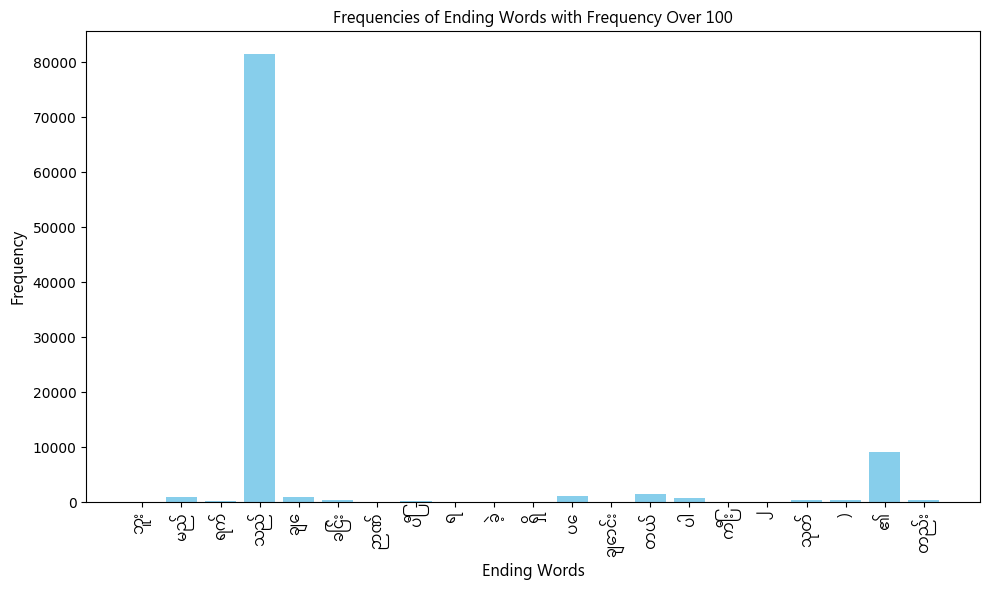

<Figure size 640x480 with 0 Axes>

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Ending Words', fontproperties=prop)
plt.ylabel('Frequency', fontproperties=prop)
plt.title('Frequencies of Ending Words with Frequency Over 100', fontproperties=prop)
plt.xticks(rotation=90, fontproperties=prop)
plt.tight_layout()
plt.show()

plt.savefig('Frequencies of Ending Words with Frequency Over 100.png')

# **String Length**

In [14]:
length = []

for sentence in sim_train:
  length.append(len(segment(sentence)))

length_unique = list(set(length))

length_frequencies1 = {i: length.count(i) for i in length_unique}
# length_frequencies1

In [15]:
length_frequencies1_over_100 = {word_length: freq for word_length, freq in length_frequencies1.items() if freq > 100}
# length_frequencies1_over_100

In [16]:
words_length = list(length_frequencies1_over_100.keys())
words_length_frequencies = list(length_frequencies1_over_100.values())

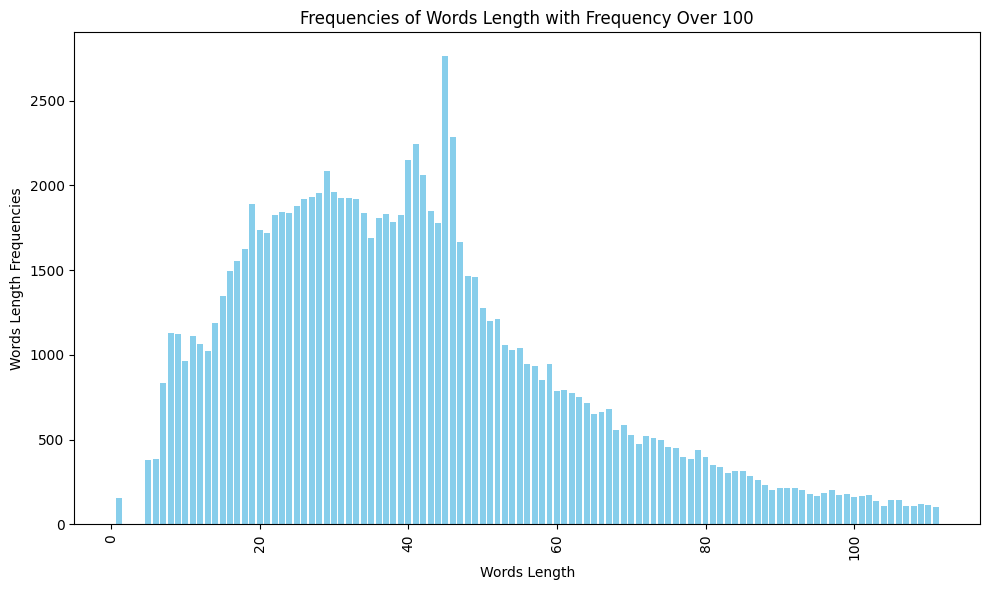

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(words_length, words_length_frequencies, color='skyblue')
plt.xlabel('Words Length')
plt.ylabel('Words Length Frequencies')
plt.title('Frequencies of Words Length with Frequency Over 100')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# **Pure Myanmar Sentences**

In [18]:
def eng_text(text):
  text = re.findall(r'\b[A-Za-z]+\b', text)
  return text

In [19]:
english_sentence_count = 0

for sentence in sim_train:
  english_words_in_sentence = eng_text(sentence)
  if english_words_in_sentence:
        english_sentence_count += 1

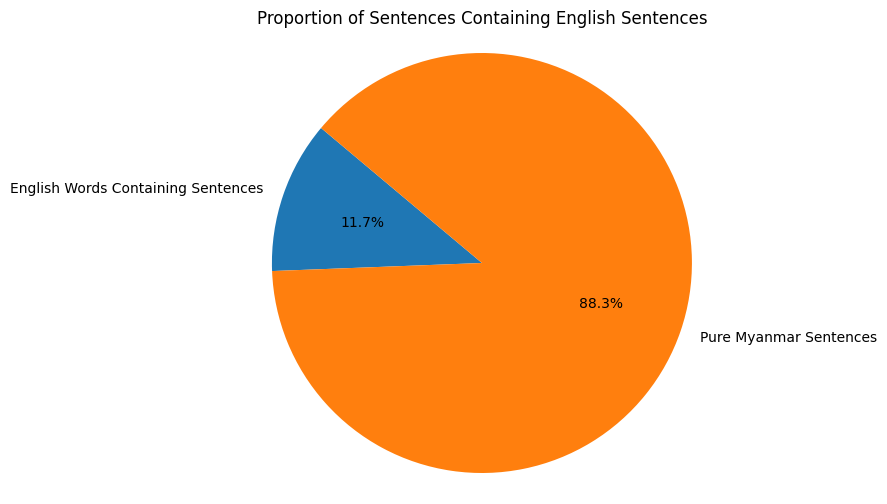

In [20]:
total_rows = len(sim_train)

english_rows = english_sentence_count

english_proportion = english_rows / total_rows

myanmar_proportion = 1 - english_proportion

labels = ['English Words Containing Sentences', 'Pure Myanmar Sentences']

sizes = [english_proportion, myanmar_proportion]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Sentences Containing English Sentences')
plt.axis('equal')
plt.show()

# **Report**

After reading over 10,000 rows in the dataset, found that some senences:


*   are **incomplete** and do not make any sense.
E.g. ၁၃၄၄ (၁) ရက်
နဂါးမေါက်ရွာ၊ ဒါပ္ပ

*   do not have **ending words**.
E.g.ဖွားမြင်၊ ရောင်းချ၊ အကယ်ဒမီရ၊ ဖြစ်ပွား။

* contains **English, Japanese, Italian and Chinese** Text.

* contains **dates in parenthesis** and some are not.
E.g. ၁၉၄၉ ခုနှစ်၊ မတ်လ (၂၀) ရက် & ၂၀၂၁ ခုနှစ်၊ အောက်တိုဘာလ ၂၉ ရက်

* come from one complete sentence because it breaks one sentence into two sentences.
E.g. "အရှင်ဘုရား... စည်၏ ဤဘက်မျက်နှာကို တီးလျှင် ရန်သူတို့ ပြေးကြလိမ့်မည် as one sentence and ဤဘက်မျက်နှာကို တီးလျှင် မေတ္တာသက်ဝင်ကြကာ အင်္ဂါလေးပါးရှိသော စည်သည်တို့လာ၍ ခြံရံကြလိမ့်မည်" ဟု မှာထားခဲ့၏ as one sentence.
In this case, these two sentences should be one because there is a dialogue with " ".

* are list with numbers and some contain all lists in a sentence.
E.g
(၁)
(၂)
(၃) as one line per list

* are from poems and one sentence as one line from original text.





1. Most sentences contains english words and english vocabularies.

2. In every sentence that describes the location, it has english name for village name.
E.g.
ဓမ္မပါလရွာ (အင်္ဂလိပ်: Dhammaparla)
State/Region >> District >> Township >> Village Tract >> Village.


# **Domain**

Sentences in the dataset are related to these field :

1. **History**
2. **Religion (History of Buddhism & Islam)**
3. **Politics (E.g. Party, Military & Battles)**
4. **Demographic Data (Population based on 2014 census)**
5. **နက္ခတ်**
6. **Biography of Myanmar and Foreign People**
7. **Species (E.g. Plant & Bird)**
8. **Units (Hertz)**
9. **Country (E.g. Kenya, India, Brazil, Australia, Cameroon)**
10. **Parli (Mantra)**
11. **Technology (E.g. AI)**
12. **Poem**
